In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import math

<Figure size 432x288 with 0 Axes>

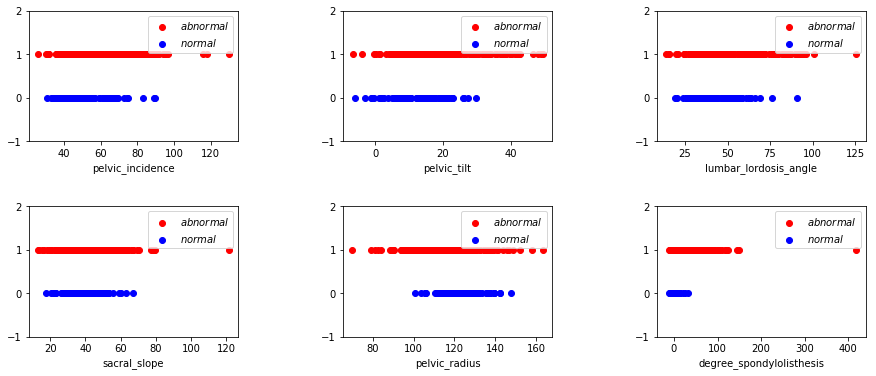

In [90]:
# question (b-i)
# load data
# class 0 is normal
# class 1 is abnormal
data = arff.loadarff('vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.replace(b'Abnormal', 1, inplace=True)
df.replace(b'Normal', 0, inplace=True)
ds=df

# question: b(i)
plt.figure()
# create 6 subplot, each plot width=10,height=6
fig,axes=plt.subplots(2,3,figsize=(15,6))

# change the distance between subplot as a fraction of the average axis width
plt.subplots_adjust(wspace =0.5, hspace =0.5)

# feature name array
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
n=0
while(n < len(features)):
    df = ds
    abnormal = df[[features[n], 'class']][df['class']==1]
    normal = df[[features[n], 'class']][df['class']==0]
    plt.subplot(2,3,n+1)
    plt.xlabel(features[n])
    plt.ylim(-1,2)
    ticks=np.linspace(-1,2,4)
    plt.yticks(ticks)
    plt.scatter(abnormal[features[n]],abnormal['class'], label = '$abnormal$', color = 'red')
    plt.scatter(normal[features[n]],normal['class'], label = '$normal$', color = 'blue')
    plt.legend(loc='upper right')
    n = n+1
plt.show()


<Figure size 432x288 with 0 Axes>

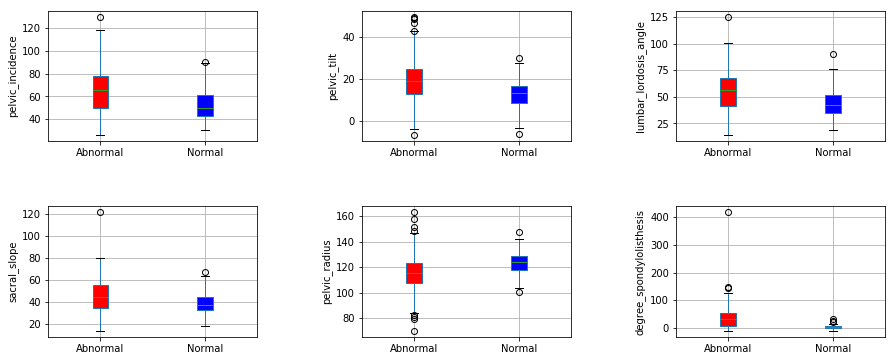

In [91]:
# question (b-ii)
# load data
data = pd.read_csv('vertebral_column_data/column_2C_weka.arff', skiprows=12,header=None)
df = pd.DataFrame(data)
# replace class as 0,1
df.replace('Abnormal', 1, inplace=True)
df.replace('Normal', 0, inplace=True)
ds=df
# create plot
plt.figure()
# create 6 subplot, each plot width=10,height=6
plt.subplots(2,3,figsize=(15,6))
# change the distance between subplot as a fraction of the average axis width
plt.subplots_adjust(wspace =0.5, hspace =0.5)

# feature1: pelvic_incidence
# df = df.iloc[0:,[0,6]]
# abnormal=df[0][df[6]==0]
# normal=df[0][df[6]==1]
# # draw boxplt
# s=pd.DataFrame({'Abnormal':abnormal, 'Normal':normal})
# plt.subplot(2,3,1)
# s.boxplot()

features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
n=0
labels=['Abnormal', 'Normal']
colors=['red', 'blue']
while(n < len(features)):
    df = ds
    df = df.iloc[0:,[n,6]]
    abnormal = df[n][df[6] == 1]
    normal = df[n][df[6] == 0]
    s = pd.DataFrame({'Abnormal':abnormal, 'Normal':normal})
    
    plt.subplot(2,3,n+1)
    # cause object conflict problem if without return_type='dict'
    bplot = s.boxplot(patch_artist=True, return_type='dict')
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    plt.ylabel(features[n])
    n=n+1
    
plt.show()

In [92]:
# question (b-iii)
#Select the first 70 rows of Class 0(normal) and the first 140 rows of Class 1 as the training set
# the rest of the data as the test set.
# load data
data = arff.loadarff('vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.replace(b'Abnormal', 1, inplace=True)
df.replace(b'Normal', 0, inplace=True)
ds=df
print('total data is',len(df))

# abnormal dataset
abnormalDataset=df[df['class']==1]
print('abnormal is',len(abnormalDataset))
# normal dataset
normalDataset=ds[ds['class']==0]
print('normal is',len(normalDataset))

trainingSet=(normalDataset.iloc[0:70]).append(abnormalDataset.iloc[0:140])
print('training set is', len(trainingSet))
testingSet=(normalDataset.iloc[70:]).append(abnormalDataset.iloc[140:])
print('testing set is', len(testingSet))
trainingSet.head()

total data is 310
abnormal is 210
normal is 100
training set is 210
testing set is 100


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


In [93]:
# question (c-i)
# Write code for k-nearest neighbors with Euclidean metric 
# (or use a software package)
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def createDataSet():
    data = arff.loadarff('vertebral_column_data/column_2C_weka.arff')
    df = pd.DataFrame(data[0])
    df.replace(b'Abnormal', 1, inplace=True)
    df.replace(b'Normal', 0, inplace=True)
    
    # abnormal dataset
    abnormalDataset=df[df['class']==1]
    # normal dataset
    normalDataset=df[df['class']==0]
    trainingSet=(normalDataset.iloc[0:70]).append(abnormalDataset.iloc[0:140])
    testingSet=(normalDataset.iloc[70:]).append(abnormalDataset.iloc[140:])
    
    # divide dataset(testdata, traindata) into data and labels parts
    trainset=trainingSet.iloc[0:,0:6]
    trainLabels=trainingSet['class']
    
    testset=testingSet.iloc[0:,0:6]
    testLabels=testingSet['class']
    return trainset, trainLabels, testset,testLabels

def EuclideanDistance(testdata, traindata):
    # get the size of dataset
    size_train=traindata.shape[0]
    size_test=testdata.shape[0]
    xx = traindata**2
    sumxx =xx.sum(axis=1)
    
    yy = testdata**2
    sumyy = yy.sum(axis=1)
    x2y2=tile(mat(sumxx).T, [1, size_test])+tile(mat(sumyy), [size_train, 1])
    
    EDsquare = x2y2-2*(mat(traindata)*mat(testdata).T)
    distance = array(EDsquare)**0.5
    return distance


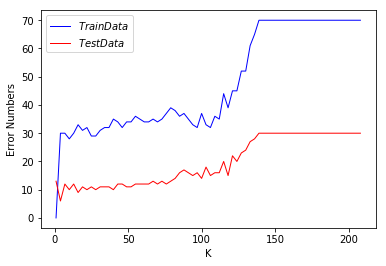

In [46]:
# question (c-ii)

traindata, trainLabels, testdata, testLabels = createDataSet()
testLabels = testLabels.to_numpy()

# set k,p by using KNN classifier
# p=2 means using Euclidean distance
# p=1 means using Manhattan distance
# neigh = KNeighborsClassifier(n_neighbors=k, p=2)
# neigh.fit(traindata, trainLabels)
# predictLabel=neigh.predict(traindata)

kSet = range(1,209,3)
# TrainSet result
trainSetErrorNum = 0
trainSetErrorList = []
for k in kSet:
    neigh = KNeighborsClassifier(n_neighbors=k, p=2)
    neigh.fit(traindata, trainLabels)

    predictLabel = neigh.predict(traindata)
    for m, n in zip(predictLabel, trainLabels):
        if m != n:
            trainSetErrorNum = trainSetErrorNum + 1
    trainSetErrorList.append(trainSetErrorNum)
    trainSetErrorNum = 0
# print(trainSetErrorArray)

# Testset result
testSetErrorNum=0
testSetErrorList=[]

for k in kSet:
    neigh = KNeighborsClassifier(n_neighbors=k, p=2)
    neigh.fit(traindata, trainLabels)
    
    predictLabel = neigh.predict(testdata)
    for m,n in zip(predictLabel,testLabels):
        if m != n:
            testSetErrorNum += 1
    testSetErrorList.append(testSetErrorNum)
    testSetErrorNum=0
# print('\n', testSetErrorArray)

# draw plot
ax = plt.gca()
ax.set_xlabel('K')
ax.set_ylabel('Error Numbers')
ax.plot(kSet, trainSetErrorList, label = '$Train Data$', color='blue', linewidth=1)
ax.plot(kSet, testSetErrorList, label = '$Test Data$', color='red', linewidth=1)
plt.legend(loc='upper left')
plt.show()


In [94]:
# get best test result when k = 4
k = 4
neigh = KNeighborsClassifier(n_neighbors=k, p=2)
neigh.fit(traindata, trainLabels)
predictLabels=neigh.predict(testdata)

confusionMatrix=confusion_matrix(testLabels, predictLabels)
print('confusionMatrix:\n', confusionMatrix)

TN, FP, FN, TP = confusionMatrix.ravel()
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
P = TP/(TP+FP)
R = TP/(TP+FN)
F_Score = 2*(P*R)/(P+R)

print('True Positive Rate:', TPR)
print('True Negative Rate:', TNR)
print('Precision:', P)
print('F-score:', F_Score)


confusionMatrix:
 [[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F-score: 0.9583333333333333


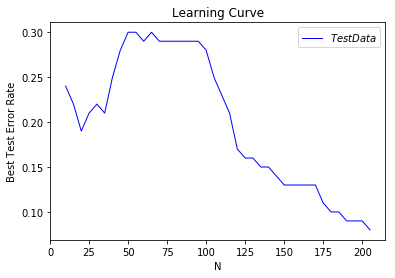

In [97]:
# question (c-iii)
traindata, trainLabels, testdata, testLabels = createDataSet()
testLabels = testLabels.to_numpy()

def getTrainSet(traindata, trainLabels, n):
    # get first n/3 class 0 data
    normalDataset=traindata.iloc[0:int(n/3)]
    normalLabels=trainLabels.iloc[0:int(n/3)]
    # append first n-n/3 class 1 data as dataset
    dataset=normalDataset.append(traindata.iloc[70:int(70+n-n/3)])
    labels=normalLabels.append(trainLabels.iloc[70:int(70+n-n/3)])
    return dataset, labels

# getTrainSet(traindata, trainLabels, 10)
# first n/3 of class 0, and first n-n/3 of class 1 as training set
# xlabel=N, zlabel=best error rate
# n=range(10,210,5)
# k=range(1,n,5)
def getBestKandErrorR(traindata, trainLabels, n, testdata, testLabels):
    kSet = range(1,n,5)
    errors=[]
    errorNum=0
    for k in kSet:
        neigh = KNeighborsClassifier(n_neighbors=k, p=2)
        neigh.fit(traindata, trainLabels)
        predictLabels=neigh.predict(testdata)
        for m,n in zip(predictLabels,testLabels):
            if m != n:
                errorNum += 1
        errors.append(errorNum)
        errorNum = 0
    return min(errors)/len(testdata)
        

nSet = range(10, 210, 5)
minErrors=[]
for n in nSet:
    dataset,labels = getTrainSet(traindata, trainLabels, n)
    minErrors.append(getBestKandErrorR(dataset, labels, n, testdata, testLabels))

# draw plot
ax = plt.gca()
plt.title('Learning Curve')
ax.set_xlabel('N')
ax.set_ylabel('Best Test Error Rate')
ax.plot(nSet, minErrors, label = '$Test Data$', color='blue', linewidth=1)
plt.legend(loc='upper right')
plt.show()

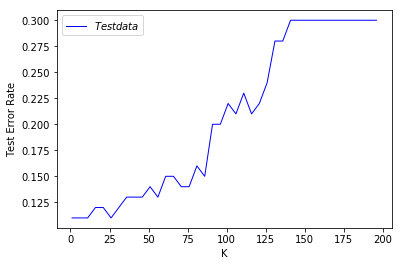

Manhattan Distance
best k is: 26
best test error rate is 0.11


In [99]:
# question (d-i-a)
traindata, trainLabels, testdata, testLabels = createDataSet()
testLabels = testLabels.to_numpy()

kSet = range(1,200,5)
# Testset result
testSetErrorNum=0
testSetErrorList=[]

# when p = 1, using Manhattan Distance
for k in kSet:
    testSetErrorNum=0
    neigh = KNeighborsClassifier(n_neighbors=k, p=1)
    neigh.fit(traindata, trainLabels)
    predictLabels = neigh.predict(testdata)
    for m,n in zip(predictLabels,testLabels):
        if m != n:
            testSetErrorNum += 1
    testSetErrorList.append(testSetErrorNum/len(testdata))

# draw plot
ax = plt.gca()
ax.set_xlabel('K')
ax.set_ylabel('Test Error Rate')
ax.plot(kSet, testSetErrorList, label = '$Test data$', color='blue', linewidth=1)
plt.legend(loc='upper left')
plt.show()

# get max k value when reach best errors based on Manhattan Distance
MDminError = min(testSetErrorList)
MDindex = 0
for index, m in zip(kSet, testSetErrorList):
    if MDminError == m:
        MDindex = index

print('Manhattan Distance')
print('best k is:', MDindex)
print('best test error rate is', MDminError)

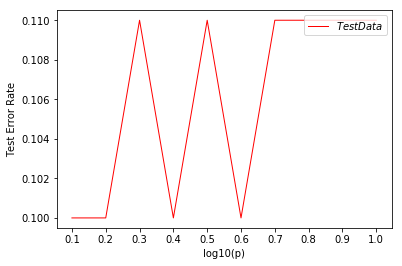

when reach best error rate: 0.1
log(10,p)= 0.1
log(10,p)= 0.2
log(10,p)= 0.4
log(10,p)= 0.6


In [107]:
# question (d-i-b)
# when k = 26, get the best result
k=26
# logpRange = [range(0.1,1.1,0.1)]
pSet=[]
testSetErrorList=[]
# get all log10(p) value
log10p = np.arange(0.1,1.1,0.1)
for i in log10p:
    # get new p-value
    newP = pow(10,i)
    neigh = KNeighborsClassifier(n_neighbors=k, p=newP)
    neigh.fit(traindata, trainLabels)
    predictLabels = neigh.predict(testdata)
    testSetErrorNum=0
    for m,n in zip(predictLabels,testLabels):
        if m != n:
            testSetErrorNum += 1
    testSetErrorList.append(testSetErrorNum/len(testdata))

# draw plot
ax = plt.gca()
ax.set_xlabel('log10(p)')
ax.set_ylabel('Test Error Rate')
myticks = np.arange(0.1, 1.1, 0.1)
ax.plot(log10p, testSetErrorList, label = '$Test Data$', color='red', linewidth=1)
plt.legend(loc='upper right')
plt.xticks(myticks)
plt.show()

# get the log(10,p) value when reach best test error rate
minTestError = min(testSetErrorList)
bestLogP = 0
print('when reach best error rate:', min(testSetErrorList))
for index, m in zip(log10p, testSetErrorList):
    if minTestError == m:
        bestLogP = index
        print('log(10,p)=', bestLogP)


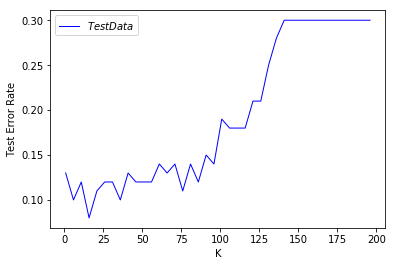

Chebyshev Distance
best k is: 16
best test error rate is 0.08


In [101]:
# question (d-i-c)
traindata, trainLabels, testdata, testLabels = createDataSet()
testLabels = testLabels.to_numpy()

kSet = range(1,200,5)
# Testset result
testSetErrorNum=0
testSetErrorList=[]

for k in kSet:
    testSetErrorNum=0
    neigh = KNeighborsClassifier(n_neighbors=k, p=float("inf"))
    neigh.fit(traindata, trainLabels)
    predictLabels = neigh.predict(testdata)
    for m,n in zip(predictLabels,testLabels):
        if m != n:
            testSetErrorNum += 1
    testSetErrorList.append(testSetErrorNum/len(testdata))

# draw plot
ax = plt.gca()
ax.set_xlabel('K')
ax.set_ylabel('Test Error Rate')
ax.plot(kSet, testSetErrorList, label = '$Test Data$', color='blue', linewidth=1)
plt.legend(loc='upper left')
plt.show()

# get max k value when reach best errors based on Chebyshev Distance
CDminError = min(testSetErrorList)
CDindex = 0
for index, m in zip(kSet, testSetErrorList):
    if CDminError == m:
        CDindex = index
print('Chebyshev Distance')
print('best k is:', CDindex)
print('best test error rate is', CDminError)

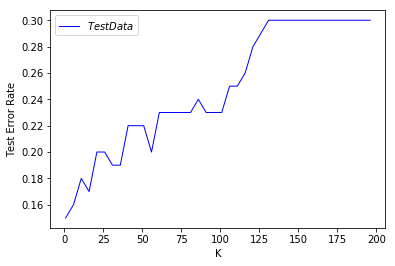

Mahalanobis Distance
best k is: 1
best test errors is 0.15


In [106]:
# question (d-ii)
traindata, trainLabels, testdata, testLabels = createDataSet()
testLabels = testLabels.to_numpy()

kSet = range(1,200,5)
# Testset result
testSetErrorNum=0
testSetErrorList=[]

for k in kSet:
    testSetErrorNum=0
    # convert to inverting the covariance matrix
    neigh = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', metric_params = {'V':np.cov(traindata, rowvar=False)})
    neigh.fit(traindata, trainLabels)
    predictLabels = neigh.predict(testdata)
    for m,n in zip(predictLabels,testLabels):
        if m != n:
            testSetErrorNum += 1
    testSetErrorList.append(testSetErrorNum/len(testdata))

# draw plot
ax = plt.gca()
ax.set_xlabel('K') 
ax.set_ylabel('Test Error Rate')
ax.plot(kSet, testSetErrorList, label = '$Test Data$', color='blue', linewidth=1)
plt.legend(loc='upper left')
plt.show()

# get max k value when reach best errors based on Mahalanobis Distance
MahaDminError = min(testSetErrorList)
MahaDindex = 0
for index, m in zip(kSet, testSetErrorList):
    if MahaDminError == m:
        MahaDindex = index

print('Mahalanobis Distance')
print('best k is:', MahaDindex)
print('best test errors is', MahaDminError)


In [103]:
summarizeData = pd.DataFrame({'K':{'Manhattan Distance':MDindex, 'Chebyshev Distance':CDindex, 'Mahalanobis Distance':MahaDindex},\
                              'Best Test Error Rate':{'Manhattan Distance':MDminError, 'Chebyshev Distance':CDminError, 'Mahalanobis Distance':MahaDminError}})
print(summarizeData)

                       K  Best Test Error Rate
Manhattan Distance    26                  0.11
Chebyshev Distance    16                  0.08
Mahalanobis Distance   1                  0.15


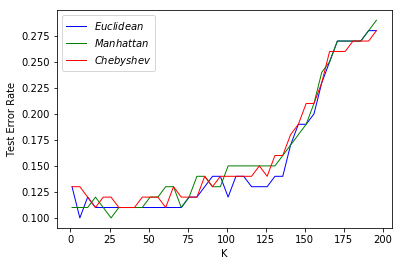

Euclidean: 0.1
Manhattan: 0.1
Chebyshev: 0.11


In [109]:
# question (e)
traindata, trainLabels, testdata, testLabels = createDataSet()
testLabels = testLabels.to_numpy()

kSet = range(1,200,5)
# Testset result
testSetErrorNum=0
EDtestSetErrorList=[]
MHtestSetErrorList=[]
CHEtestSetErrorList=[]

for k in kSet:
    # Euclidean Distance
    testSetErrorNum=0
    neigh = KNeighborsClassifier(n_neighbors=k,weights='distance',p=2)
    neigh.fit(traindata, trainLabels)
    predictLabels = neigh.predict(testdata)
    for m,n in zip(predictLabels,testLabels):
        if m != n:
            testSetErrorNum += 1
    EDtestSetErrorList.append(testSetErrorNum/len(testdata))
    
    # Manhattan Distance
    testSetErrorNum=0
    neigh = KNeighborsClassifier(n_neighbors=k,weights='distance',p=1)
    neigh.fit(traindata, trainLabels)
    predictLabels = neigh.predict(testdata)
    for m,n in zip(predictLabels,testLabels):
        if m != n:
            testSetErrorNum += 1
    MHtestSetErrorList.append(testSetErrorNum/len(testdata))
    
    # Chebyshev Distance
    testSetErrorNum = 0
    neigh = KNeighborsClassifier(n_neighbors=k,weights='distance',p=float("inf"))
    neigh.fit(traindata, trainLabels)
    predictLabels = neigh.predict(testdata)
    for m,n in zip(predictLabels,testLabels):
        if m != n:
            testSetErrorNum += 1
    CHEtestSetErrorList.append(testSetErrorNum/len(testdata))

# draw plot
ax = plt.gca()
ax.set_xlabel('K')
ax.set_ylabel('Test Error Rate')
ax.plot(kSet, EDtestSetErrorList, label = '$Euclidean$', color='blue', linewidth=1)
ax.plot(kSet, MHtestSetErrorList, label = '$Manhattan$', color='green', linewidth=1)
ax.plot(kSet, CHEtestSetErrorList, label = '$Chebyshev$', color='red', linewidth=1)
plt.legend(loc='upper left')
plt.show()

print('Euclidean:', min(EDtestSetErrorList))
print('Manhattan:', min(MHtestSetErrorList))
print('Chebyshev:', min(CHEtestSetErrorList))


In [ ]:
# question(f)
# lowest training error = 0 when k = 1